<a href="https://colab.research.google.com/github/afrahnaaz/AI/blob/main/AIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [31]:
df.shape

(836, 10)

In [32]:
df.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


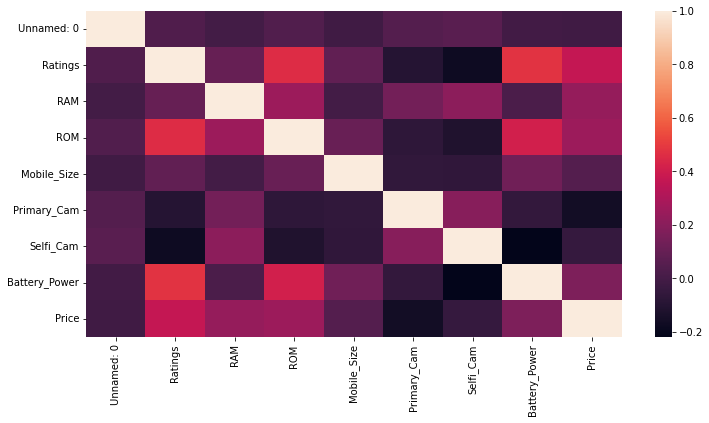

In [34]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [39]:
df = df[['Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price']]

In [ ]:
data

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999
...,...,...,...,...,...,...,...,...
831,3.8,6.0,32.0,4.54,48,12.0,2800,1299
832,4.1,8.0,64.0,4.54,64,NaN,2500,1390
833,4.4,3.0,32.0,6.20,48,1.0,3800,9790
834,3.7,10.0,32.0,4.50,64,NaN,3500,799


In [41]:
df.isnull().sum()

Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [42]:
df=df.drop('Selfi_Cam', axis=1)

In [43]:
df=df.dropna()

In [45]:
df

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,4000,24999
1,3.4,6.0,64.0,4.50,48,4000,15999
2,4.3,4.0,4.0,4.50,64,4000,15000
3,4.4,6.0,64.0,6.40,48,3800,18999
4,4.5,6.0,128.0,6.18,35,3800,18999
...,...,...,...,...,...,...,...
831,3.8,6.0,32.0,4.54,48,2800,1299
832,4.1,8.0,64.0,4.54,64,2500,1390
833,4.4,3.0,32.0,6.20,48,3800,9790
834,3.7,10.0,32.0,4.50,64,3500,799


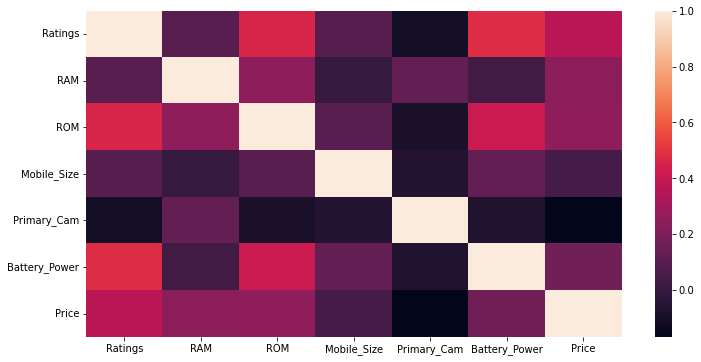

In [61]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
x=df.drop('Price', axis=1)
y=df['Price']
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.score(X_train,y_train)

0.20091353293957537

In [50]:
model.score(X_test,y_test)

0.20733510145429757

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [53]:
dt.score(X_train,y_train)

0.9695104772658583

In [54]:
dt.score(X_test,y_test)

0.9631034810145547

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [56]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
rf.score(X_train,y_train)

0.9406469886905156

In [58]:
rf.score(X_test,y_test)

0.5724383941766822

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))
print(dt.score(X_train,y_train))

0.9620579334341027
0.9695104772658583


In [60]:
import pickle
pickle.dump(model,open('model.pkl','wb'))